In [1]:
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import pandas as pd
from copy import deepcopy
from matplotlib import ticker as mticker

In [2]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

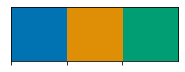

In [3]:
current_palette = sns.color_palette('colorblind')[:3]
sns.palplot(current_palette)

  0%|          | 0/3 [00:00<?, ?it/s]

finish loading


 33%|███▎      | 1/3 [06:23<12:47, 383.70s/it]

finish loading


 67%|██████▋   | 2/3 [11:21<05:32, 332.93s/it]

finish loading


100%|██████████| 3/3 [13:42<00:00, 274.04s/it]


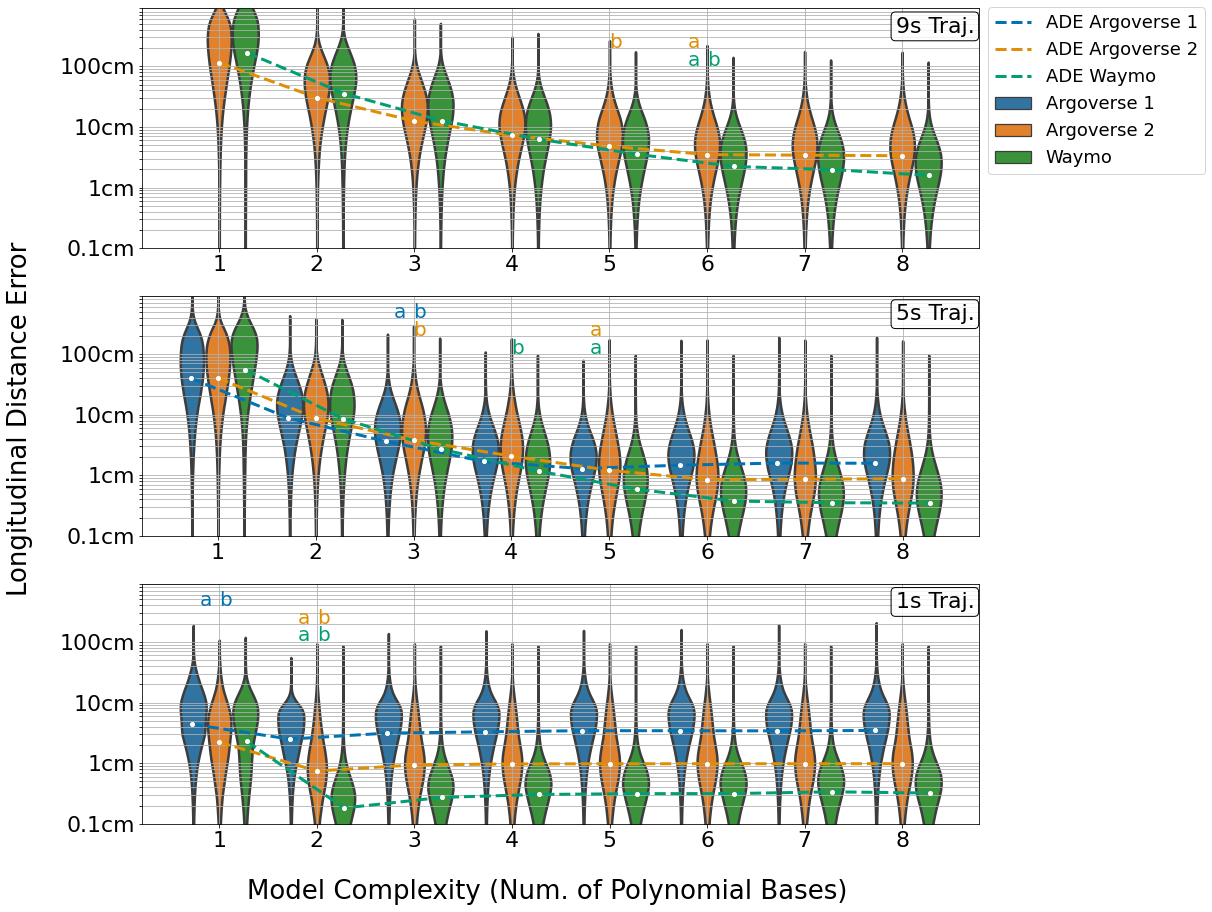

In [70]:
data_name_1 = 'argo1'
data_name_2 = 'argo2'
data_name_3 = 'waymo'
metric_type = 'kf_poly_lon'
fig_name = 'Longitudinal Positional Fitting Error Compared to Measurement'
nums_points_in_one_traj = [90, 50, 10] #[90, 80, 70, 60, 50, 40, 30, 20, 10]
x_ticklabels = ['1', '2', '3', '4', '5', '6', '7', '8']

tick_range = [x for p in [-3, -2, -1, 0] for x in np.linspace(10 ** p, 9 * 10 ** p, 9)]

y_ticklabels = []
for p in ['0.1cm', '1cm', '10cm', '100cm']:
    for i in range(9):
        if i == 0:
            y_ticklabels.append(p)
        else:
            y_ticklabels.append('')

#fig1, axs = plt.subplots(len(nums_points_in_one_traj), 1, figsize = (15, 45))
fig1, axs = plt.subplots(len(nums_points_in_one_traj), 1, figsize = (15, 15))
#fig1.suptitle(fig_name, y=0.92)
fig1.supxlabel('Model Complexity (Num. of Polynomial Bases)', y=0.05)
fig1.supylabel('Longitudinal Distance Error', x = 0)
for idx, num_points in enumerate(tqdm(nums_points_in_one_traj)):
    ax = axs[idx]
    if num_points < 51:
        with open('results/agt_pos_error_polar_' + data_name_1 + '/' + str(num_points) + '/' + metric_type + '.json', "r") as read_file:
            data_1 = np.array(json.load(read_file)) # keep it as list for visualization
            data_1 = np.log10(data_1[:, ::7]+ 1e-10)
    else:
        data_1 = np.log10(np.zeros((8,100)) + 1e-10)
    
    with open('results/agt_pos_error_polar_' + data_name_2 + '/' + str(num_points) + '/' + metric_type + '.json', "r") as read_file:
        data_2 = np.array(json.load(read_file)) # keep it as list for visualization
        data_2 = np.log10(data_2[:, ::7]+ 1e-10).reshape(8, -1)
        
    with open('results/agt_pos_error_polar_' + data_name_3 + '/' + str(num_points+1) + '/' + metric_type + '.json', "r") as read_file:
        data_3 = np.array(json.load(read_file)) # keep it as list for visualization
        data_3 = np.log10(data_3[:, ::7]+ 1e-10).reshape(8, -1)
    
    d = {'deg': [], 'error': [], 'type': []}
    
    for deg, (d1, d2, d3) in enumerate(zip(data_1, data_2, data_3)):
        for dd1 in d1:
            d['deg'].append(deg+1)
            d['error'].append(dd1)
            d['type'].append('Argoverse 1')
            
        for dd2 in d2:
            d['deg'].append(deg+1)
            d['error'].append(dd2)
            d['type'].append('Argoverse 2') 
            
        for dd3 in d3:
            d['deg'].append(deg+1)
            d['error'].append(dd3)
            d['type'].append('Waymo')
    
    test_data = pd.DataFrame(data=d)
    
    if num_points < 51:
        with open('results/agt_pos_error_polar_' + data_name_1 + '/' + str(num_points) + '/' + 'result_summary.json', "r")as read_file:
            result_argo1 = json.load(read_file)
        best_agro1_AIC_idx = result_argo1['best_aic_deg_idx']
        best_agro1_BIC_idx = result_argo1['best_bic_deg_idx']
                
    with open('results/agt_pos_error_polar_' + data_name_2 + '/' + str(num_points) + '/' + 'result_summary.json', "r")as read_file:
         result_argo2 = json.load(read_file)
    best_agro2_AIC_idx = result_argo2['best_aic_deg_idx']
    best_agro2_BIC_idx = result_argo2['best_bic_deg_idx']
            
    with open('results/agt_pos_error_polar_' + data_name_3 + '/' + str(num_points+1) + '/' + 'result_summary.json', "r")as read_file:
         result_waymo = json.load(read_file)
    best_waymo_AIC_idx = result_waymo['best_aic_deg_idx']
    best_waymo_BIC_idx = result_waymo['best_bic_deg_idx']
    print('finish loading')
    
    
    
    ax = sns.violinplot(x = test_data.deg, y = test_data.error,  hue=test_data.type, data = test_data, ax=ax, linewidth = 2.5,inner = None)
    ax.plot(np.array(range(8)) - 0.28, np.mean(data_1,axis = 1), '--' , color=current_palette[0], linewidth = 3, label = 'ADE Argoverse 1')
    ax.plot(np.array(range(8)), np.mean(data_2,axis = 1), '--' , color=current_palette[1], linewidth = 3, label = 'ADE Argoverse 2')
    ax.plot(np.array(range(8)) + 0.28, np.mean(data_3,axis = 1), '--' , color=current_palette[2], linewidth = 3, label = 'ADE Waymo')
    
    ax.plot(np.array(range(8)) - 0.28, np.mean(data_1,axis = 1), 'wo', markersize = 4)
    ax.plot(np.array(range(8)), np.mean(data_2,axis = 1), 'wo', markersize = 4)
    ax.plot(np.array(range(8)) + 0.28, np.mean(data_3,axis = 1), 'wo', markersize = 4)
    if idx == 0:
        #ax.legend(fontsize = 18, loc='lower center', bbox_to_anchor=(0.5, 1), handlelength= 10)
        ax.legend(fontsize = 18, loc='lower center', bbox_to_anchor=(1.14, 0.27), handlelength= 2)
    else:
        ax.get_legend().remove()
        
    ax.annotate(str(int(num_points/10)) + 's Traj.',
            xy = (0.9, 0.9),
            xycoords='axes fraction',
            bbox=dict(facecolor=(1, 1, 1, 0.8), edgecolor='black', boxstyle='round,pad=0.2'))
    if num_points < 51:
        ax.annotate('a', fontsize= 20, color=current_palette[0],xy = (best_agro1_AIC_idx-0.2, 0.6))
        ax.annotate('b', fontsize= 20, color=current_palette[0], xy = (best_agro1_BIC_idx, 0.6))
    
    ax.annotate('a', fontsize= 20, color=current_palette[1], xy = (best_agro2_AIC_idx-0.2, 0.3))
    ax.annotate('b', fontsize= 20, color=current_palette[1], xy = (best_agro2_BIC_idx, 0.3))
    
    ax.annotate('a', fontsize= 20, color=current_palette[2], xy = (best_waymo_AIC_idx-0.2, 0.01))
    ax.annotate('b', fontsize= 20, color=current_palette[2], xy = (best_waymo_BIC_idx, 0.01))
    
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel('')
    ax.set_ylim([np.log10(1e-3), np.log10(1e0)])
    ax.set_ylabel('')
    ax.set_yticks(np.log10(tick_range))
    ax.set_yticklabels(y_ticklabels)
    ax.grid(True)
    ax.plot()

In [72]:
fig1.savefig('imgs/MAE_summary_lon_mean_159.pdf', dpi=300, format='pdf', bbox_inches='tight')
fig1.savefig('imgs/MAE_summary_lon_mean_159.svg', dpi=300, format='svg', bbox_inches='tight')

 33%|███▎      | 1/3 [00:00<00:00,  6.20it/s]

finish loading
finish loading


100%|██████████| 3/3 [00:00<00:00,  5.68it/s]


finish loading


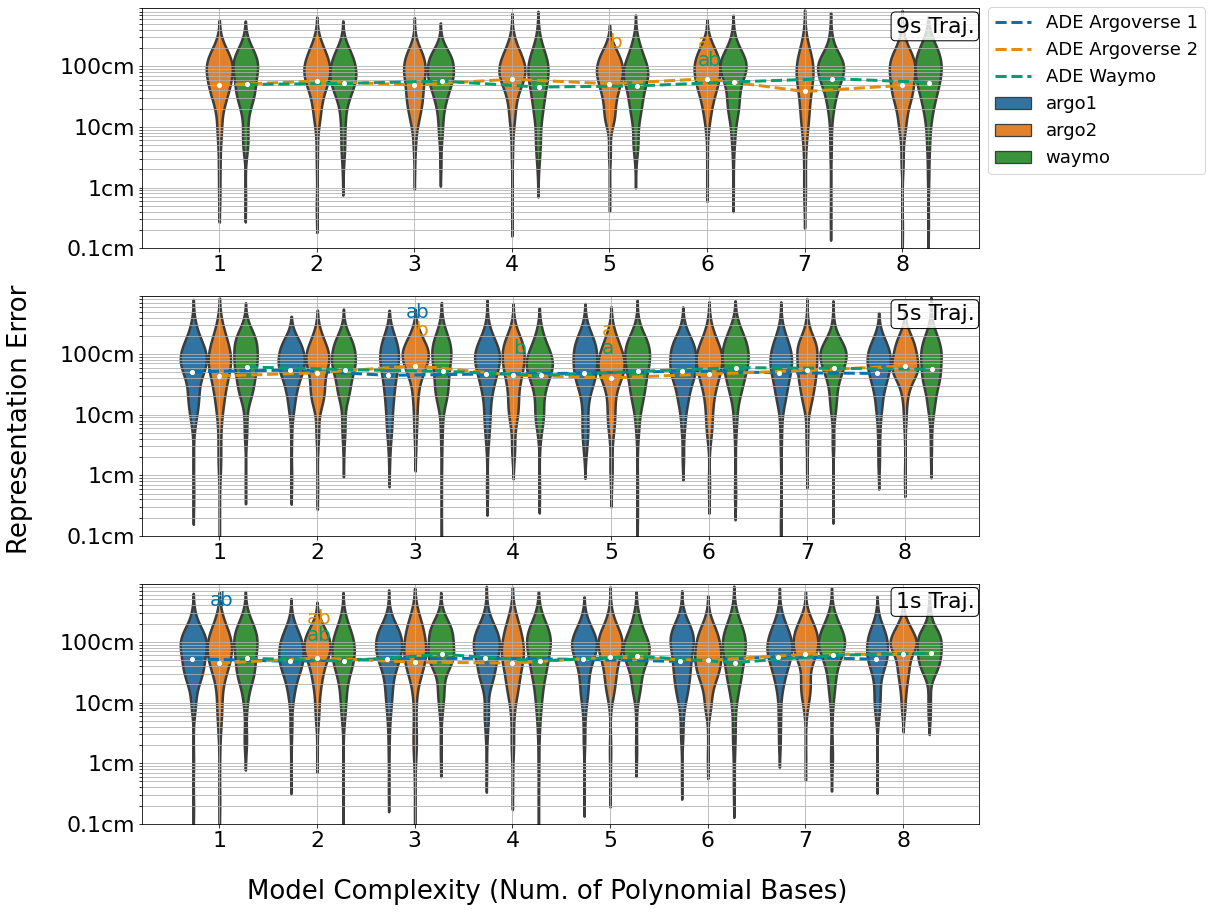

In [68]:
data_name_1 = 'argo1'
data_name_2 = 'argo2'
data_name_3 = 'waymo'
metric_type = 'kf_poly_lon'
fig_name = 'Longitudinal Positional Fitting Error Compared to Measurement'
nums_points_in_one_traj = [90, 50, 10]# [90, 80, 70, 60, 50, 40, 30, 20, 10]
x_ticklabels = ['1', '2', '3', '4', '5', '6', '7', '8']

tick_range = [x for p in [-3, -2, -1, 0] for x in np.linspace(10 ** p, 9 * 10 ** p, 9)]

y_ticklabels = []
for p in ['0.1cm', '1cm', '10cm', '100cm']:
    for i in range(9):
        if i == 0:
            y_ticklabels.append(p)
        else:
            y_ticklabels.append('')

fig1, axs = plt.subplots(len(nums_points_in_one_traj), 1, figsize = (15, 15))
#fig1.suptitle(fig_name, y=0.92)
fig1.supxlabel('Model Complexity (Num. of Polynomial Bases)', y=0.05)
fig1.supylabel('Representation Error', x = 0)
for idx, num_points in enumerate(tqdm(nums_points_in_one_traj)):
    ax = axs[idx]
    if num_points < 51:
            data_1 = np.log10(np.abs(np.random.randn(8, 100))) 
    else:
        data_1 = np.log10(np.zeros((8,100)) + 1e-10)
    
    data_2 = np.log10(np.abs(np.random.randn(8, 100))) 
        
    data_3 = np.log10(np.abs(np.random.randn(8, 100))) 
    
    d = {'deg': [], 'error': [], 'type': []}
    
    for deg, (d1, d2, d3) in enumerate(zip(data_1, data_2, data_3)):
        for dd1 in d1:
            d['deg'].append(deg+1)
            d['error'].append(dd1)
            d['type'].append(data_name_1)
            
        for dd2 in d2:
            d['deg'].append(deg+1)
            d['error'].append(dd2)
            d['type'].append(data_name_2) 
            
        for dd3 in d3:
            d['deg'].append(deg+1)
            d['error'].append(dd3)
            d['type'].append(data_name_3)
    
    test_data = pd.DataFrame(data=d)
    
    if num_points < 51:
        with open('results/agt_pos_error_polar_' + data_name_1 + '/' + str(num_points) + '/' + 'result_summary.json', "r")as read_file:
            result_argo1 = json.load(read_file)
        best_agro1_AIC_idx = result_argo1['best_aic_deg_idx']
        best_agro1_BIC_idx = result_argo1['best_bic_deg_idx']
                
    with open('results/agt_pos_error_polar_' + data_name_2 + '/' + str(num_points) + '/' + 'result_summary.json', "r")as read_file:
         result_argo2 = json.load(read_file)
    best_agro2_AIC_idx = result_argo2['best_aic_deg_idx']
    best_agro2_BIC_idx = result_argo2['best_bic_deg_idx']
            
    with open('results/agt_pos_error_polar_' + data_name_3 + '/' + str(num_points+1) + '/' + 'result_summary.json', "r")as read_file:
         result_waymo = json.load(read_file)
    best_waymo_AIC_idx = result_waymo['best_aic_deg_idx']
    best_waymo_BIC_idx = result_waymo['best_bic_deg_idx']
    print('finish loading')
    
    
    
    ax = sns.violinplot(x = test_data.deg, y = test_data.error,  hue=test_data.type, data = test_data, ax=ax, linewidth = 2.5, inner = None)
    ax.plot(np.array(range(8)) - 0.28, np.mean(data_1,axis = 1), '--' , color=current_palette[0], linewidth = 3, label = 'ADE Argoverse 1')
    ax.plot(np.array(range(8)), np.mean(data_2,axis = 1), '--' , color=current_palette[1], linewidth = 3, label = 'ADE Argoverse 2')
    ax.plot(np.array(range(8)) + 0.28, np.mean(data_3,axis = 1), '--' , color=current_palette[2], linewidth = 3, label = 'ADE Waymo')
    
    ax.plot(np.array(range(8)) - 0.28, np.mean(data_1,axis = 1), 'wo', markersize = 4)
    ax.plot(np.array(range(8)), np.mean(data_2,axis = 1), 'wo', markersize = 4)
    ax.plot(np.array(range(8)) + 0.28, np.mean(data_3,axis = 1), 'wo', markersize = 4)
    
    
    if idx == 0:
        ax.legend(fontsize = 18, loc='lower center', bbox_to_anchor=(1.14, 0.27), handlelength= 2)
    else:
        ax.get_legend().remove()
        
    ax.annotate(str(int(num_points/10)) + 's Traj.',
            xy = (0.9, 0.9),
            xycoords='axes fraction',
            bbox=dict(facecolor=(1, 1, 1, 0.8), edgecolor='black', boxstyle='round,pad=0.2'))
    
    if num_points < 51:
        ax.annotate('a', fontsize= 20, color=current_palette[0],xy = (best_agro1_AIC_idx-0.1, 0.6))
        ax.annotate('b', fontsize= 20, color=current_palette[0], xy = (best_agro1_BIC_idx, 0.6))
    
    ax.annotate('a', fontsize= 20, color=current_palette[1], xy = (best_agro2_AIC_idx-0.1, 0.3))
    ax.annotate('b', fontsize= 20, color=current_palette[1], xy = (best_agro2_BIC_idx, 0.3))
    
    ax.annotate('a', fontsize= 20, color=current_palette[2], xy = (best_waymo_AIC_idx-0.1, 0.01))
    ax.annotate('b', fontsize= 20, color=current_palette[2], xy = (best_waymo_BIC_idx, 0.01))
    
    ax.set_xticklabels(x_ticklabels)
    ax.set_xlabel('')
    ax.set_ylim([np.log10(1e-3), np.log10(1e0)])
    ax.set_ylabel('')
    ax.set_yticks(np.log10(tick_range))
    ax.set_yticklabels(y_ticklabels)
    ax.grid(True)
    ax.plot()

In [37]:
data_name = 'waymo'
num_points = 81
deg = 6
with open('results/agt_pos_error_polar_' + data_name + '/' + str(num_points) + '/kf_poly_lon.json', "r") as read_file:
    data_lon = np.array(json.load(read_file))[deg-1].reshape(-1, 1)
    
with open('results/agt_pos_error_polar_' + data_name + '/' + str(num_points) + '/kf_poly_lat.json', "r") as read_file:
    data_lat = np.array(json.load(read_file))[deg-1].reshape(-1, 1)


In [38]:
ADE = np.mean(np.linalg.norm(np.concatenate([data_lon, data_lat], axis=1), axis=1))
ADE

0.035798501235718594